DATASET( https://www.kaggle.com/datasets/sagarbapodara/parkinson-csv )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [ ]:
pkd=pd.read_csv('/content/parkinsons.csv')
pkd.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
pkd.shape

(195, 24)

In [ ]:
pkd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
pkd['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
pkd=pkd.drop(columns=['name'])


In [ ]:
pkd.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#grouping the data on target variable
pkd.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


there is a clear difference in parkinson patient and normal patient.

<Axes: >

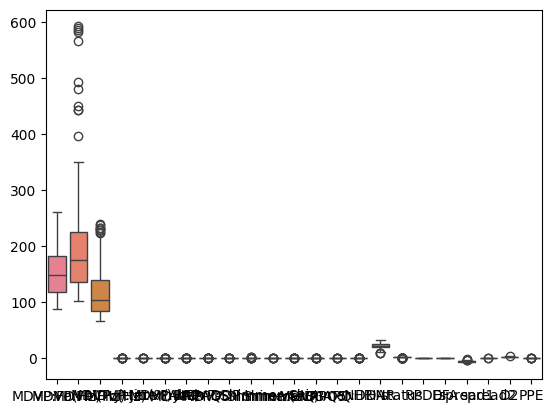

In [ ]:
sns.boxplot(data=pkd)

In [ ]:
a='MDVP:Fhi(Hz)'
Q1=pkd[a].quantile(0.25)
Q3=pkd[a].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
pkd=pkd[(pkd[a]>=lower_bound) & (pkd[a]<=upper_bound)]

<Axes: >

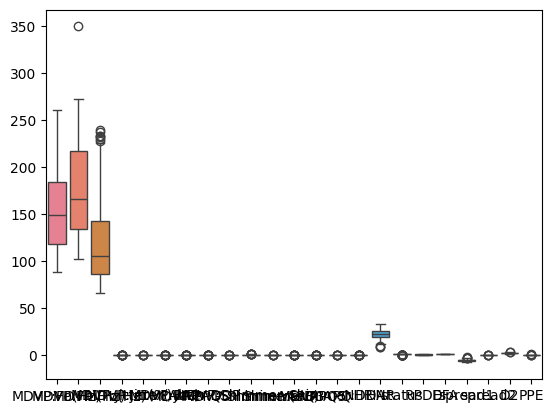

In [ ]:
sns.boxplot(data=pkd)

In [ ]:
a='MDVP:Flo(Hz)'
Q1=pkd[a].quantile(0.25)
Q3=pkd[a].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
pkd=pkd[(pkd[a]>=lower_bound) & (pkd[a]<=upper_bound)]

<Axes: >

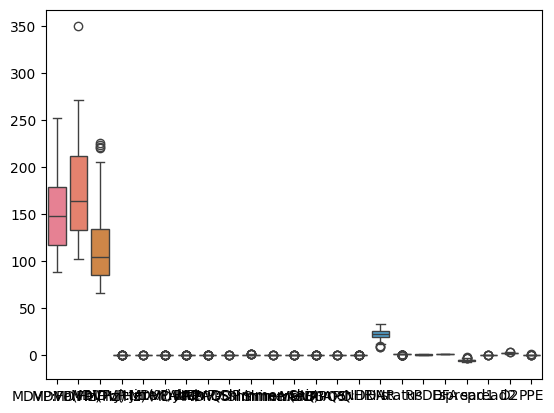

In [ ]:
sns.boxplot(data=pkd)

In [ ]:
x=pkd.drop('status',axis=1)
y=pkd['status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_sca_train=scaler.fit_transform(x_train)
x_sca_test=scaler.fit_transform(x_test)

In [ ]:
#using optuna for hyper parameter tuning
!pip install optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def objective(trial):
    """Objective function for Optuna optimization"""
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    score = cross_val_score(model, x_sca_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print best hyperparameters
print("Best parameters:", study.best_params)
print("Best score:", study.best_value)

[I 2025-03-16 10:45:40,907] A new study created in memory with name: no-name-755301bb-0a34-4efb-8b3b-55a36a8d3afb
[I 2025-03-16 10:45:51,216] Trial 0 finished with value: 0.7825396825396826 and parameters: {'n_estimators': 466, 'max_depth': 30, 'min_samples_split': 14, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 0 with value: 0.7825396825396826.
[I 2025-03-16 10:45:55,343] Trial 1 finished with value: 0.8190476190476191 and parameters: {'n_estimators': 424, 'max_depth': 33, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 1 with value: 0.8190476190476191.
[I 2025-03-16 10:45:56,259] Trial 2 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 94, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 2 with value: 0.8333333333333334.
[I 2025-03-16 10:45:58,897] Trial 3 finished with value: 0.7902116402116401 and parameters: {'n_estimators': 310, 'max_depth': 37, 'm

Best parameters: {'n_estimators': 190, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best score: 0.8989417989417989


In [ ]:
#manually and without parameter tuning
#parameter optuna use kore best parameter ta nisi, ar ekhne copy kore disi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model2=RandomForestClassifier(n_estimators=190, max_depth=25, min_samples_split=9, min_samples_leaf=1, max_features='log2')
model2.fit(x_sca_train,y_train)
e2=model2.predict(x_sca_train)
f2=model2.predict(x_sca_test)
print(accuracy_score(y_train,e2))
print(accuracy_score(y_test,f2))

In [ ]:
#manually and without parameter tuning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model1=SVC()
model1.fit(x_sca_train,y_train)
e1=model1.predict(x_sca_train)
f1=model1.predict(x_sca_test)
print(accuracy_score(y_train,e1))
print(accuracy_score(y_test,f1))

0.8985507246376812
0.8857142857142857


In [ ]:
#manually and without parameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model3=DecisionTreeClassifier()
model3.fit(x_sca_train,y_train)
e3=model3.predict(x_sca_train)
f3=model3.predict(x_sca_test)
print(accuracy_score(y_train,e3))
print(accuracy_score(y_test,f3))

1.0
0.8


In [ ]:
#manually and without parameter tuning
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model4=GaussianNB()
model4.fit(x_sca_train,y_train)
e4=model4.predict(x_sca_train)
f4=model4.predict(x_sca_test)
print(accuracy_score(y_train,e4))
print(accuracy_score(y_test,f4))

1.0
0.8857142857142857


In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def objective(trial):
    c = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=c, kernel=kernel, degree=degree, gamma=gamma, random_state=42)
    score = cross_val_score(model, x_sca_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters for SVC:", study.best_params)
print("Best score for SVC:", study.best_value)


In [ ]:
from sklearn.naive_bayes import GaussianNB

def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)

    model = GaussianNB(var_smoothing=var_smoothing)
    score = cross_val_score(model, x_sca_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters for GaussianNB:", study.best_params)
print("Best score for GaussianNB:", study.best_value)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )
    score = cross_val_score(model, x_sca_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters for DecisionTreeClassifier:", study.best_params)
print("Best score for DecisionTreeClassifier:", study.best_value)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score

def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    score = cross_val_score(model, x_sca_train, y_train, cv=5, scoring=make_scorer(r2_score)).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters for Linear Regression:", study.best_params)
print("Best score for Linear Regression:", study.best_value)


In [ ]:
from sklearn.linear_model import LogisticRegression

def objective(trial):
    c = trial.suggest_loguniform('C', 1e-5, 1e2)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', 'none']) if solver != 'liblinear' else trial.suggest_categorical('penalty', ['l1', 'l2'])

    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
    else:
        l1_ratio = None

    model = LogisticRegression(C=c, solver=solver, penalty=penalty, l1_ratio=l1_ratio, max_iter=1000, random_state=42)
    score = cross_val_score(model, x_sca_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters for Logistic Regression:", study.best_params)
print("Best score for Logistic Regression:", study.best_value)
